# **Очереди**

В этой главе рассматривается очередь, еще одна линейная коллекция, широко используемая в информатике. Существует несколько стратегий реализации очередей — некоторые основаны на
массивах, а другие - на связанных структурах. Чтобы проиллюстрировать применение очереди, в этой
главе приводится практический пример, имитирующий кассовую линию супермаркета. Глава
завершается рассмотрением особого вида очереди, известной как очередь с приоритетом, и показывает
, как она используется во втором практическом примере.

## **Обзор очередей**

Как и стеки, очереди представляют собой линейные коллекции. Однако в случае очередей вставки ограничены
одним концом, называемым задним, а удаления - другим концом, называемым передним. Таким образом, очередь
поддерживает протокол "первый вход - первый выход" (FIFO). Очереди вездесущи в повседневной жизни и
возникают в любой ситуации, когда люди или вещи выстраиваются в очередь для обслуживания или обработки в
порядке живой очереди. Очереди к кассам в магазинах, очереди в пунктах взимания платы за проезд по шоссе и очереди
на регистрацию багажа в аэропортах являются знакомыми примерами очередей.

Очереди выполняют две основные операции: add, которая добавляет элемент в конец очереди,
и pop, которая удаляет элемент из начала. На рисунке 8-1 показана очередь такой, какой она может
выглядеть на различных этапах своего существования. На рисунке передняя часть очереди находится слева, а
задняя - справа.

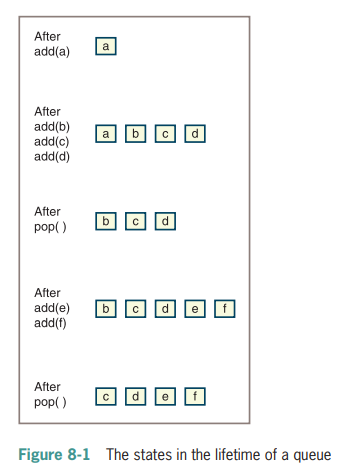

Изначально очередь пуста. Затем добавляется элемент с именем a. Далее добавляются еще три элемента с именами
b, c и d, после чего элемент извлекается и так далее.

С очередями связана коллекция, называемая очередью с приоритетом. В очереди элемент, загруженный или
обслуживаемый следующим, всегда является элементом, который ждал дольше всего. Но в некоторых обстоятельствах это ограничение слишком жесткое, и предпочтительнее сочетать идею ожидания с
понятием приоритета. В приоритетной очереди элементы с более высоким приоритетом загружаются раньше элементов
с более низким приоритетом, а элементы с равным приоритетом загружаются в порядке FIFO. Рассмотрим, например,
порядок посадки пассажиров в самолет. Пассажиры первого класса выстраиваются в очередь и
садитесь первыми, а пассажиры пассажирского класса с более низким приоритетом выстраиваются в очередь и садятся вторыми. Однако это не настоящая приоритетная очередь, потому что после того, как очередь в первый класс опустеет и
начнется посадка в вагоны бизнес-класса, опоздавшие пассажиры первого класса обычно идут в конец
второй очереди. В очереди с настоящим приоритетом они сразу же опередили бы всех
пассажиров бизнес-класса.

## **Интерфейс очереди и его использование**

Если они спешат, программисты на Python могут использовать список на Python для эмуляции очереди.
Хотя не имеет значения, какие концы списка вы рассматриваете как начало и конец
очереди, самая простая стратегия - использовать метод списка append для добавления элемента в конец
этой очереди и использовать метод списка pop(0) для удаления и возврата элемента в конце очереди. впереди
своей очереди. Как вы видели в случае со стеками, основным недостатком этого варианта является то, что все
другие операции со списком также могут манипулировать очередью. К ним относятся вставка, замена и удаление элемента в любой позиции. Эти дополнительные операции нарушают дух
очереди как абстрактного типа данных. Более того, удаление элемента в начале объекта списка Python
является операцией линейного времени. В этом разделе определяется более ограниченный интерфейс или набор
операций для любой реализации очереди и показано, как эти операции используются.

Помимо операций добавления и pop, будет полезно иметь операцию peek, которая
возвращает элемент в начале очереди. Остальные операции в интерфейсе очереди
являются стандартными для любой коллекции. В таблице 8-1 перечислены все они.

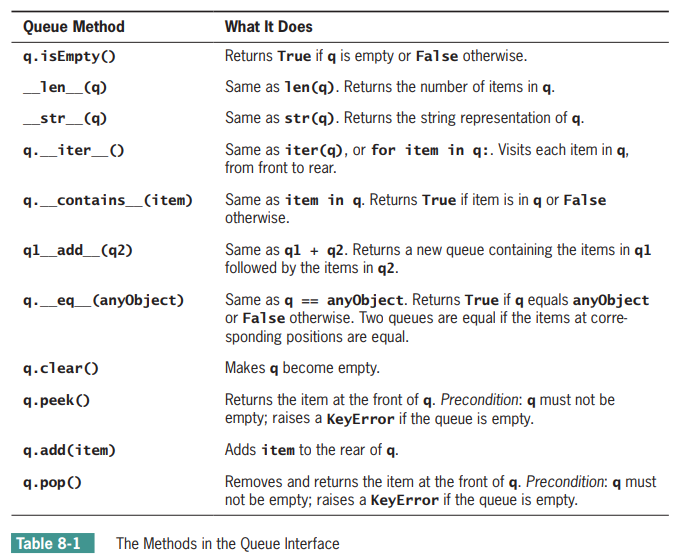

## **Два приложения очередей**

Теперь в этой главе кратко рассматриваются два применения очередей: одно из них связано с компьютерным
моделированием, а другое - с циклическим планированием работы процессора.

### **Моделирование**

Компьютерное моделирование используется для изучения поведения систем реального мира, особенно
когда нецелесообразно или опасно экспериментировать с этими системами напрямую.
Например, компьютерное моделирование может имитировать транспортный поток на оживленном шоссе.
Затем градостроители могли бы поэкспериментировать с факторами, влияющими на транспортный поток, такими как количество
и типы транспортных средств на шоссе, ограничения скорости для различных типов транспортных средств,
количество полос движения на шоссе и частота появления пунктов взимания платы. Результаты такого анализа
моделирование может включать в себя общее количество транспортных средств, способных перемещаться между назначенными
точками за определенный период, и среднюю продолжительность поездки. Запустив моделирование с использованием множества комбинаций входных данных, проектировщики могли бы определить, как наилучшим образом
модернизировать участки шоссе, учитывая постоянно существующие ограничения по времени, пространству
и деньгам.

В качестве второго примера рассмотрим проблему, с которой сталкивается менеджер супермаркета,
пытающийся определить количество кассиров, которые должны работать по расписанию в разное время
суток. Некоторые важные факторы в этой ситуации следующие:


*   Частота, с которой приходят новые клиенты
*   Количество доступных кассиров на кассе
*   Количество товаров в корзине покупок клиента
*   Рассматриваемый период времени

Эти факторы могут быть входными данными для программы моделирования, которая затем определит
общее количество обработанных клиентов, среднее время ожидания обслуживания каждым клиентом
и количество клиентов, оставшихся стоять в очереди в конце моделируемого периода.
Варьируя входные данные, в частности частоту прихода клиентов и количество
доступных кассиров, программа моделирования может помочь менеджеру принимать эффективные
кадровые решения в напряженное и неспешное время суток. Добавляя входные данные, которые количественно определяют
оценивая эффективность различного кассового оборудования, менеджер может даже решить, что
выгоднее с точки зрения затрат - добавить больше кассиров или купить лучшее, более производительное оборудование.

Общей характеристикой обоих примеров и задач моделирования в целом является
моментальная изменчивость существенных факторов. Рассмотрим частоту прихода клиентов к кассам. Если бы покупатели приходили через определенные промежутки времени, каждый с одинаковым количеством
товаров, было бы легко определить, сколько кассиров должно быть на дежурстве. Однако такая
регулярность не отражает реалий супермаркета. Иногда несколько клиентов появляются
практически в одно и то же время, а в других случаях новые клиенты не приходят в течение нескольких минут.
Кроме того, количество товаров варьируется от клиента к клиенту; следовательно, меняется
и объем обслуживания, который требуется каждому клиенту. Вся эта изменчивость затрудняет разработку
формул для ответов на простые вопросы о системе, например, о том, как меняется время ожидания клиента
в зависимости от количества дежурных кассиров. Программа моделирования, с другой стороны, позволяет избежать
необходимости в формулах, имитируя реальную ситуацию и собирая соответствующую статистику.

Программы моделирования используют простую технику для имитации изменчивости. Например, предположим
, что ожидается прибытие новых клиентов в среднем каждые 4 минуты. Затем, в течение каждой
минуты моделируемого времени, программа может генерировать случайное число от 0 до 1. Если
это число меньше 1/4, программа добавляет нового клиента в очередь на оформление заказа; в противном случае это не происходит. Более сложные схемы, основанные на функциях распределения вероятностей
, дают еще более реалистичные результаты. Очевидно, что при каждом запуске программы результаты
немного меняются, но это только добавляет реалистичности моделированию.

Теперь вы узнаете, какую общую роль играют очереди в этих примерах. В обоих примерах
участвуют поставщики услуг и потребители услуг. В первом примере поставщики услуг
включают пункты взимания платы и полосы движения, а потребителями услуг являются транспортные средства, ожидающие у
пунктов взимания платы и движущиеся по полосам движения. Во втором примере кассиры предоставляют услугу
, которую потребляют ожидающие клиенты. Чтобы имитировать эти условия в программе, свяжите каждого поставщика услуг с очередью потребителей услуг.

### **Циклическое планирование работы процессора**

Большинство современных компьютеров позволяют нескольким процессам совместно использовать один центральный процессор. Существуют различные методы планирования этих процессов. Наиболее распространенный, называемый циклическим
планированием, добавляет новые процессы в конец очереди готовности, которая состоит из процессов
, ожидающих использования центрального процессора. Каждый процесс в очереди готовности запускается по очереди, и ему предоставляется фрагмент
процессорного времени. Когда временной фрагмент заканчивается, процесс возвращается в конец очереди,
как показано на рисунке 8-2.

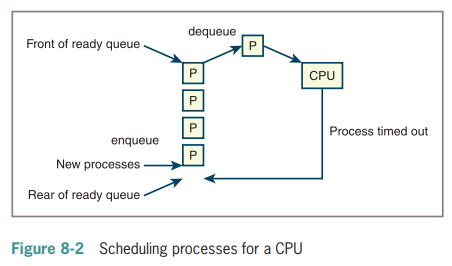

## **Реализации очередей**

Подход, применяемый в этой главе к реализации очередей, аналогичен тому, который
использовался для стеков. Структура очереди может быть реализована либо в виде массива, либо
в виде связанной реализации. Чтобы получить некоторое поведение по умолчанию бесплатно, подклассифицируйте каждую
реализацию queue в классе AbstractCollection в вашей платформе collection framework (см.
Глава 6, “Наследование и абстрактные классы”). Поскольку связанная реализация
несколько более проста, сначала рассмотрите ее.

## **Связанная реализация очередей**

Связанные реализации стеков и очередей имеют много общего. Оба класса,
LinkedStack и LinkedQueue, используют односвязный класс Node для реализации узлов.
Операция pop удаляет первый узел в последовательности в обеих коллекциях. Однако
LinkedQueue.add и LinkedStack.push различаются. Операция push добавляет узел в
начале последовательности, тогда как add добавляет узел в конце. Чтобы обеспечить быстрый доступ к обоим
концам связанной структуры очереди, существуют внешние указатели на оба конца. На рисунке 8-3
показана связанная очередь, содержащая четыре элемента.

Переменным экземпляра front и rear класса LinkedQueue присваивается начальное значение
None. Переменная с именем size, уже определенная в платформе collection framework, отслеживает количество элементов, находящихся в данный момент в очереди.

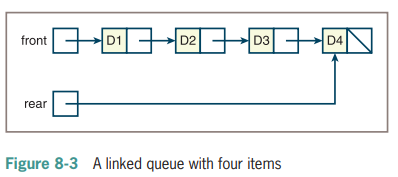

Во время операции добавления создайте новый узел, установите следующий указатель последнего узла на новый
узел и установите переменную rear на новый узел, как показано на рисунке 8-4.

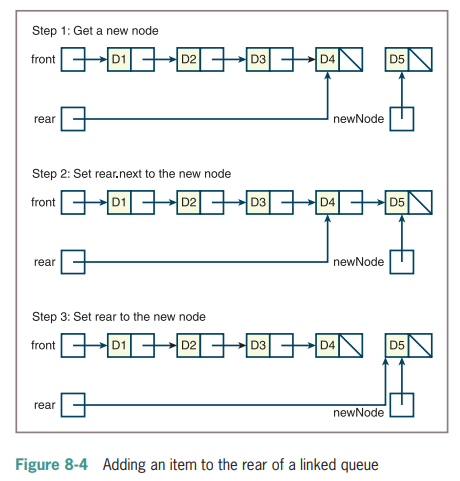

Вот код для метода добавления:

In [2]:
class LinkedQueue():
    '''
    This class will be our queue
    '''

    def add(self, newItem):
        """Adds newItem to the rear of the queue."""

        newNode = Node(newItem, None)
        if self.isEmpty():
            self.front = newNode
        else:
            self.rear.next = newNode
            self.rear = newNode
            self.size += 1

    def pop(self):
        """Removes and returns the item at front of the queue.
        Precondition: the queue is not empty."""

        # Check precondition here
        oldItem = self.front.data
        self.front = self.front.next
        if self.front is None:
            self.rear = None
        self.size -= 1
        return oldItem

## **Реализация массива**

Массивные реализации стеков и очередей имеют меньше общего, чем связанные
реализации. Массивная реализация стека должна получать доступ к элементам только в
логическом конце массива. Однако массивная реализация очереди должна получать доступ к элементам в
логическом начале и логическом конце. Сделать это эффективным с точки зрения вычислений способом
сложно, поэтому лучше всего подходить к решению задачи последовательно, с трех попыток.

### **Первая попытка**

Первая попытка реализации очереди фиксирует начало очереди в позиции индекса 0
и поддерживает переменную индекса, называемую rear, которая указывает на последний элемент в позиции n21,
где n - количество элементов в очереди. Изображение такой очереди с четырьмя элементами данных
в массиве из шести ячеек показано на рис. 8-5.

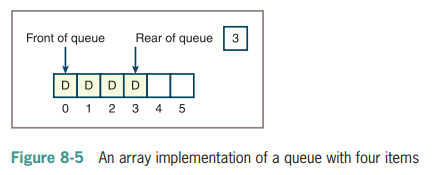

## **Вторая попытка**

Вы можете избежать линейного поведения pop, не перемещая элементы влево при каждом применении операции
. Модифицированная реализация поддерживает второй индекс, называемый front, который указывает
на элемент в начале очереди. Передний указатель начинается с 0 и перемещается по
массиву по мере извлечения элементов. На рисунке 8-6 показана такая очередь после пяти операций добавления и двух
операций извлечения.

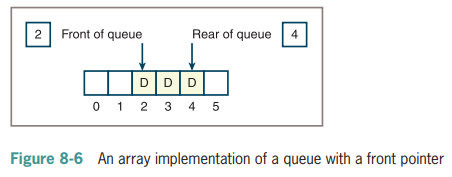

Обратите внимание, что в этой схеме ячейки слева от переднего указателя очереди не используются до тех пор, пока вы
не сдвинете все элементы влево, что вы делаете всякий раз, когда задний указатель вот-вот достигнет конца.
Теперь максимальное время выполнения pop равно O(1), но это достигается за счет увеличения
максимального времени выполнения add с O(1) до(n). Более того, массив памяти слева
от переднего указателя недоступен для очереди.

### **Третья попытка**

Используя реализацию циклического массива, вы можете одновременно добиться хорошего
времени выполнения как для add, так и для pop. Реализация похожа на предыдущую в одном отношении:
передний и задний указатели начинаются с начала массива.

Однако передний указатель теперь “преследует” задний указатель по массиву. Во
время операции добавления задний указатель перемещается дальше перед передним указателем, а во
время операции pop передний указатель догоняет его на одну позицию. Когда какой-либо указатель вот-вот
достигнет конца массива, этот указатель сбрасывается в 0. Это приводит к переносу
очереди в начало массива без затрат на перемещение каких-либо элементов.

В качестве примера предположим, что реализация массива использует шесть ячеек, что было
добавлено шесть элементов и что затем были удалены два элемента. Согласно этой схеме, следующее добавление
сбрасывает задний указатель на 0. На рисунке 8-7 показано состояние массива до и после
сброса заднего указателя на 0 в результате последней операции добавления.

Задний указатель теперь, по-видимому, преследует передний указатель до тех пор, пока передний указатель не достигнет
конца массива, после чего он также сбрасывается в 0. Как вы можете легко видеть, максимальное время выполнения как add, так и pop теперь равно O(1).

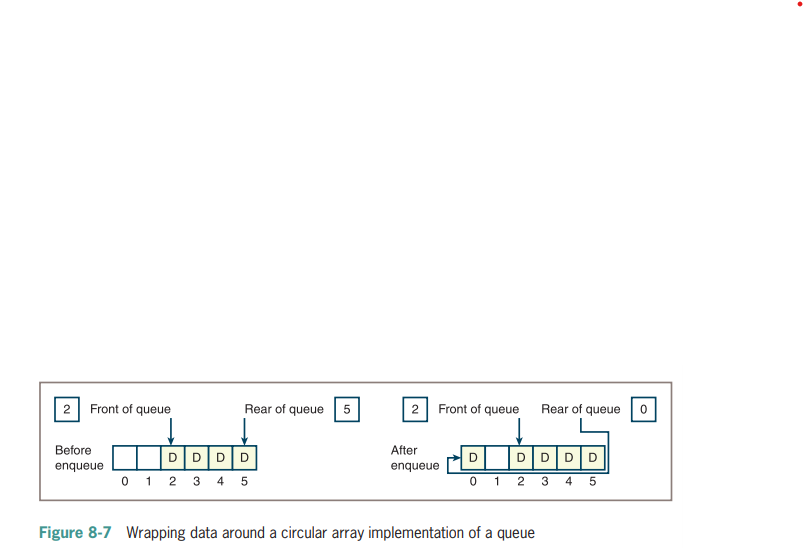

## **Анализ времени и пространства для двух реализаций**

Анализ времени и пространства для двух классов очередей параллелен анализу для соответствующих
классов стека, поэтому вы не будете останавливаться на деталях. Рассмотрим сначала связанную реализацию
очередей. Время выполнения методов __str__, __add__ и __eq__ равно O(n). Максимальное время выполнения всех остальных методов равно O(1). В частности, поскольку
в связанной структуре очереди имеются внешние ссылки на головной и конечный узлы, вы можете получать доступ к этим узлам
в течение постоянного времени. Общая потребность в пространстве составляет 2 3 n1 , где n - размер очереди.
В каждом из n узлов есть ссылка на исходную точку и указатель на следующий узел, а
также есть три ячейки для логического размера очереди и указателей head и tail.

Для реализации очередей с циклическим массивом, если массив является статическим, максимальное время выполнения всех методов, отличных от __str__, __add__ и __eq__, равно O(1). В частности,
никакие элементы в массиве не сдвигаются во время добавления или pop. Если массив динамический, добавьте и pop
переходите к O(n) при каждом изменении размера массива, но сохраняйте среднее время выполнения O(1).
Использование пространства для реализации массива снова зависит от коэффициента загрузки, как обсуждалось в
Глава 4, “Массивы и связанные структуры”. При коэффициентах загрузки выше ½ реализация массива более эффективно использует память, чем связанная реализация, а при коэффициентах загрузки
ниже ½ использование памяти менее эффективно.

## **Приоритетные очереди**

Как упоминалось ранее, очередь с приоритетом - это специализированный тип очереди. Когда элементы добавляются
в очередь с приоритетом, им присваивается порядок ранжирования. Когда они удаляются, элементы
с более высоким приоритетом удаляются раньше элементов с более низким приоритетом. Элементы с равным приоритетом
удаляются в обычном порядке FIFO. Элемент A имеет более высокий приоритет, чем элемент B, если A , B.

Таким образом, целые числа, строки или любые другие объекты, которые распознают операторы сравнения, могут
быть упорядочены в приоритетных очередях. Если объект не распознает эти операторы, это может быть
упакованный с номером приоритета в другой объект, который распознает эти
операторы. Затем очередь распознает этот объект как сопоставимый с другими объектами его типа.
Поскольку очередь с приоритетом очень похожа на очередь без очереди, они имеют одинаковый интерфейс или набор
операций (см. таблицу 8-1). В таблице 8-6 показаны состояния в течение срока службы очереди с приоритетом. Обратите
внимание, что элементы являются целыми числами, поэтому меньшие целые числа - это элементы с более высоким приоритетом.

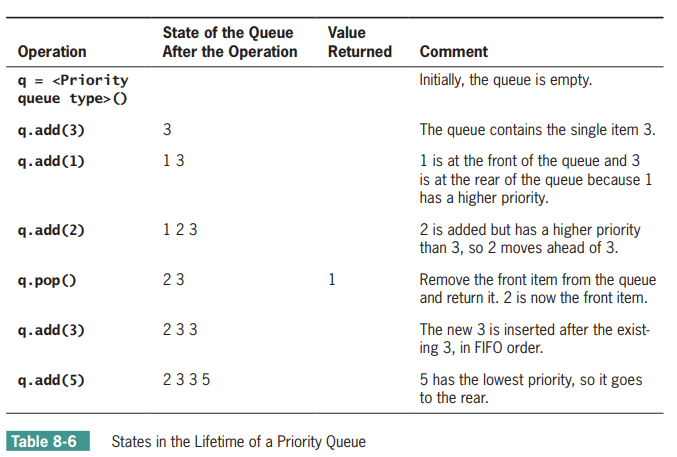

Как упоминалось ранее, когда объект не сопоставим по своей сути, он может быть обернут
с приоритетом в другой сопоставимый объект. Вы определяете класс-оболочку, используемый для создания сопоставимого элемента из того, который еще не сопоставим. Этот новый класс называется
Сравнимый. Он включает конструктор, который ожидает элемент и приоритет элемента в качестве аргументов. Приоритет должен быть целым числом, строкой или другим объектом, который распознает операторы
сравнения. Напомним, что Python ищет методы сравнения объекта, когда
используются операторы сравнения. После создания объекта-оболочки вы можете использовать
методы GetItem, get Priority, __str__, __eq__, __le__ и __lt__ для извлечения
элемента или его приоритета, возврата его строкового представления и поддержки сравнений на основе
приоритет, соответственно. Вот код для сопоставимого класса:

In [3]:
class Comparable(object):
    """Wrapper class for items that are not comparable."""

    def __init__(self, data, priority = 1):

        self.data = data
        self.priority = priority

    def __str__(self):
        """Returns the string rep of the contained datum."""

        return str(self.data)

    def __eq__(self, other):
        """Returns True if the contained priorities are equal
        or False otherwise."""

        if self is other: return True
        if type(self) != type(other): return False
        return self.priority == other.priority

    def __lt__(self, other):
        """Returns True if self’s priority < other’s priority,
        or False otherwise."""

        return self.priority < other.priority

    def __le__(self, other):
        """Returns True if self’s priority <= other’s priority,
        or False otherwise."""

        return self.priority <= other.priority

    def getData(self):
        """Returns the contained datum."""

        return self.data

    def getPriority(self):
        """Returns the contained priority."""

        return self.priority

Обратите внимание, что метод __str__ также включен в сопоставимый класс, так что метод очереди
__str__ будет иметь ожидаемое поведение с этими элементами.

Во время вставок приоритетная очередь не знает, сравнивает ли она элементы в оболочках или просто элементы. Когда доступ к обернутому элементу осуществляется с помощью метода peek или pop или в
контексте цикла for, перед обработкой он должен быть развернут с помощью метода GetItem.
Например, предположим, что элементы с метками a, b и c несопоставимы, но должны иметь
приоритеты 1, 2 и 3 соответственно в очереди. Затем код для добавления их в очередь с приоритетом
с именем queue и извлечения их из нее выглядит следующим образом:


```
queue.add(Comparable(a, 1))
queue.add(Comparable(b, 2))
queue.add(Comparable(c, 3))
while not queue.isEmpty():
    item = queue.pop().getItem()
    <do something with item>
```



В этой книге рассматриваются две реализации приоритетной очереди. В этой главе мы обсудим
реализацию отсортированного списка, которая расширяет класс LinkedQueue, представленный ранее. Позже, в главе 10
“Деревья”, мы рассмотрим структуру данных, называемую кучей, в качестве альтернативной реализации.

Отсортированный список - это список сопоставимых элементов, которые поддерживаются в естественном порядке. Список приоритетной очереди должен быть организован таким образом, чтобы минимальный элемент всегда был доступен только в
одном конце списка или удалялся только из него. Элементы вставляются в соответствующие им места в
порядке убывания.

Односвязная структура хорошо представляет этот тип списка, если минимальный элемент всегда
удаляется из заголовка структуры. Если эта структура унаследована от односвязной
структуры, используемой в классе LinkedQueue, вы можете продолжить удаление элемента, запустив метод pop этого класса. Необходимо изменить только метод add. Его определение переопределено в новом подклассе, называемом LinkedPriorityQueue.

Чтобы проиллюстрировать процесс, описанный в примере 2, на рис. 8-10 показано состояние приоритетной очереди, содержащей три целых числа 1, 3 и 4, во время добавления значения 2. Обратите внимание на
настройки указателей зонда и прицепа во время этого процесса.

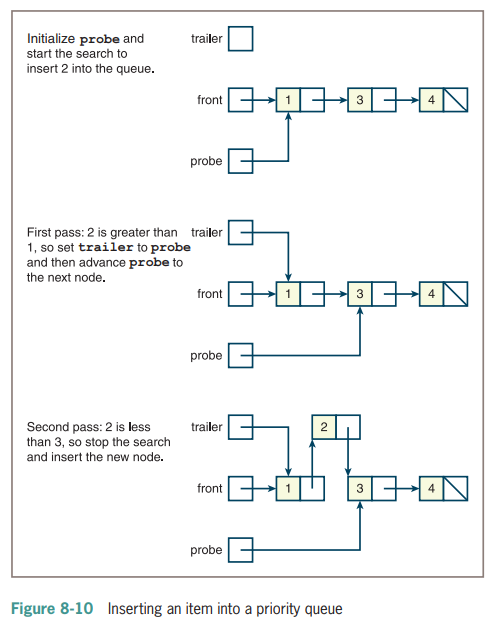

Хотя код для add сложен, вам не нужно писать другие методы в новом
классе. Более того, использование LinkedQueue в add ранее в случае 1 несколько упрощает новый метод
.


Вот код для класса LinkedPriorityQueue:

In [4]:
"""
File: linkedpriorityqueue.py
"""


class LinkedPriorityQueue(LinkedQueue):
    """A link-based priority queue implementation."""

    def __init__(self, sourceCollection = None):
        """Sets the initial state of self, which includes the
        contents of sourceCollection, if it’s present."""

        LinkedQueue.__init__(self, sourceCollection)

    def add(self, newItem):
        """Inserts newItem after items of greater or equal
        priority or ahead of items of lesser priority.
        A has greater priority than B if A < B."""

        if self.isEmpty() or newItem >= self.rear.data:
            # New item goes at rear
            LinkedQueue.add(self, newItem)
        else:
            # Search for a position where it’s less
            probe = self.front
            while newItem >= probe.data:
                trailer = probe
                probe = probe.next
            newNode = Node(newItem, probe)
            if probe == self.front:
                # New item goes at front
                self.front = newNode
            else:
                # New item goes between two nodes
                trailer.next = newNode
            self.size += 1

Анализ времени и пространства для LinkedPriorityQueue такой же, как и для LinkedQueue,
за исключением метода add. Теперь этот метод должен выполнять поиск подходящего места
для вставки элемента. Перестановка ссылок после того, как это место найдено, требует постоянного времени, но сам поиск линейный, поэтому добавить теперь O(n).